## Importar librerias

In [8]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

%matplotlib inline
plt.style.use('fivethirtyeight')
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (12, 9)


## Importar dataset

In [2]:
df = pd.read_csv('/content/jm_train.csv')
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [3]:
# importamos el conjuto de test
df_test = pd.read_csv('/content/jm_X_test.csv')
df_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


## Analisis exploratorio de datos (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


Podemos ver que todas las variables predictoras son numericas

In [5]:
df.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
target      0
dtype: int64

Podemos ver que no hay valores perdidos en el dataset

In [6]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


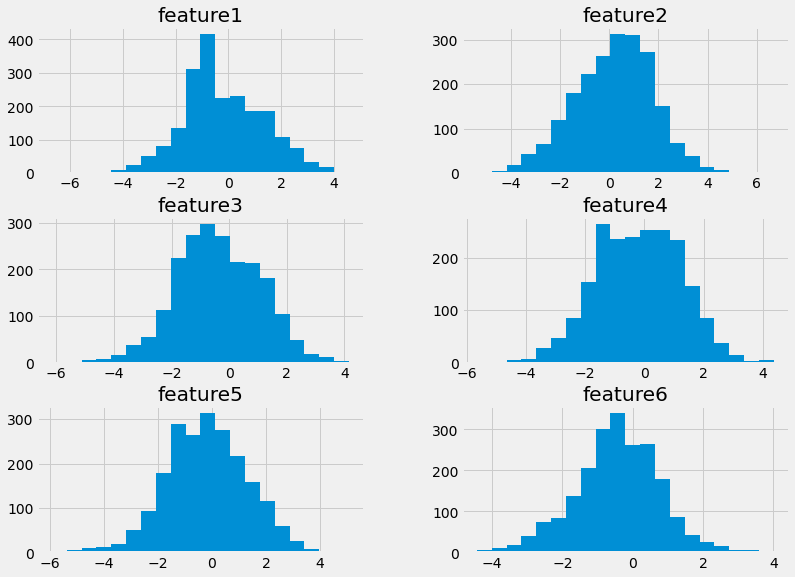

In [9]:
_ = df.drop(columns='target').hist(bins=20)

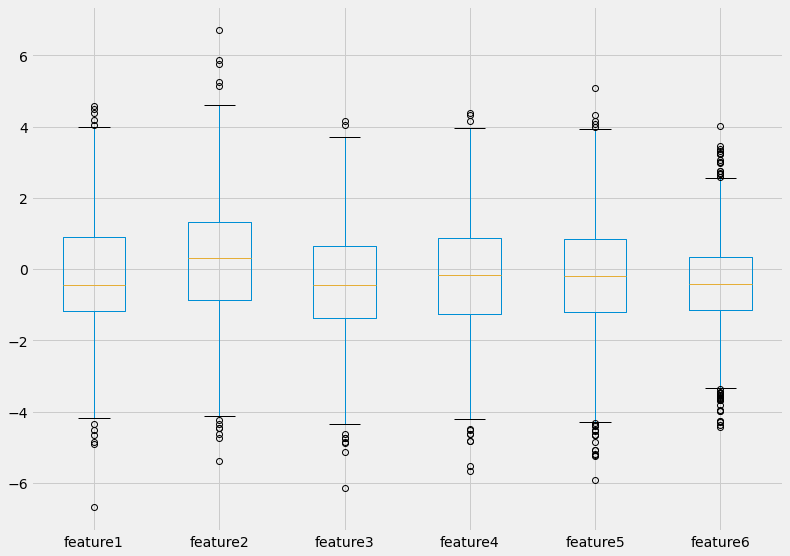

In [10]:
df.drop(columns='target').boxplot()

A simple vista todas las columnas siguen una distribucion normal sobretodo la feature7 y feature8. 

En todas las variables podemos observar algunos valores atipicos, pero son valores factibles.

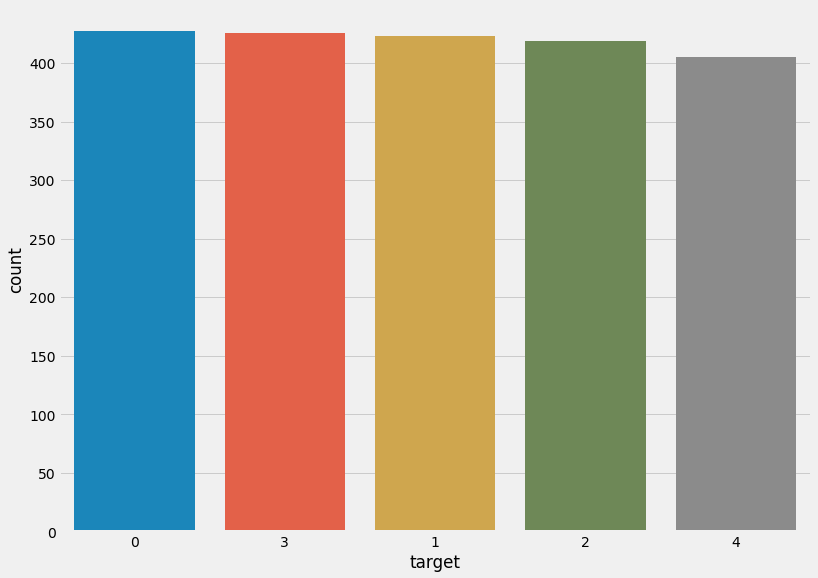

In [11]:
sns.countplot(data=df, x='target', order=df.target.value_counts().index)

No se observa desbalanceo de clases de la variable target

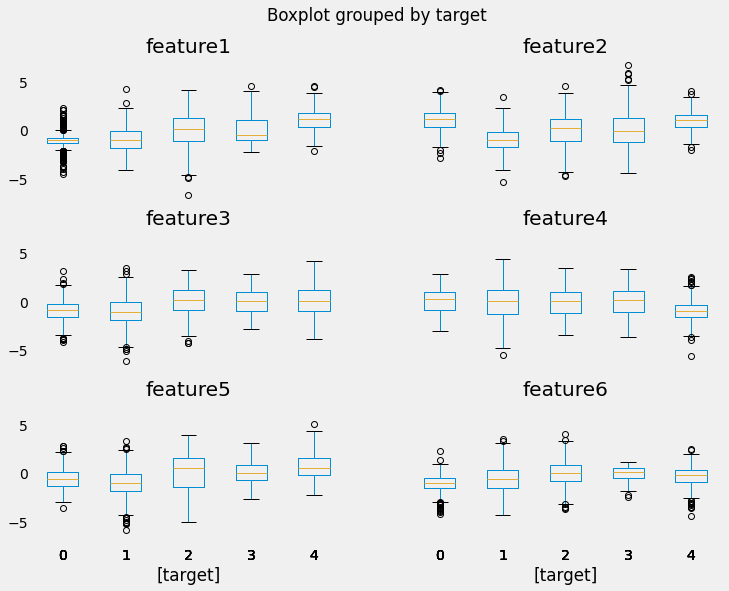

In [12]:

_ = df.boxplot(by='target', grid=False)

A simple vista se puede observar que la variabilidad de los datos (rango intercuartilico) y la mediana de las cajas son diferentes en casi todas las variables.

a continuacion vemos las variables que estan mas correlacionadas y son las mas importantes para la variable target

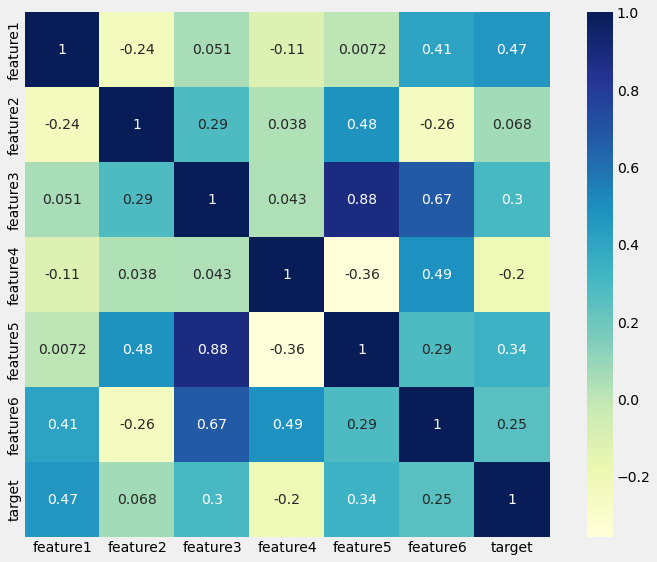

In [14]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", square=True)

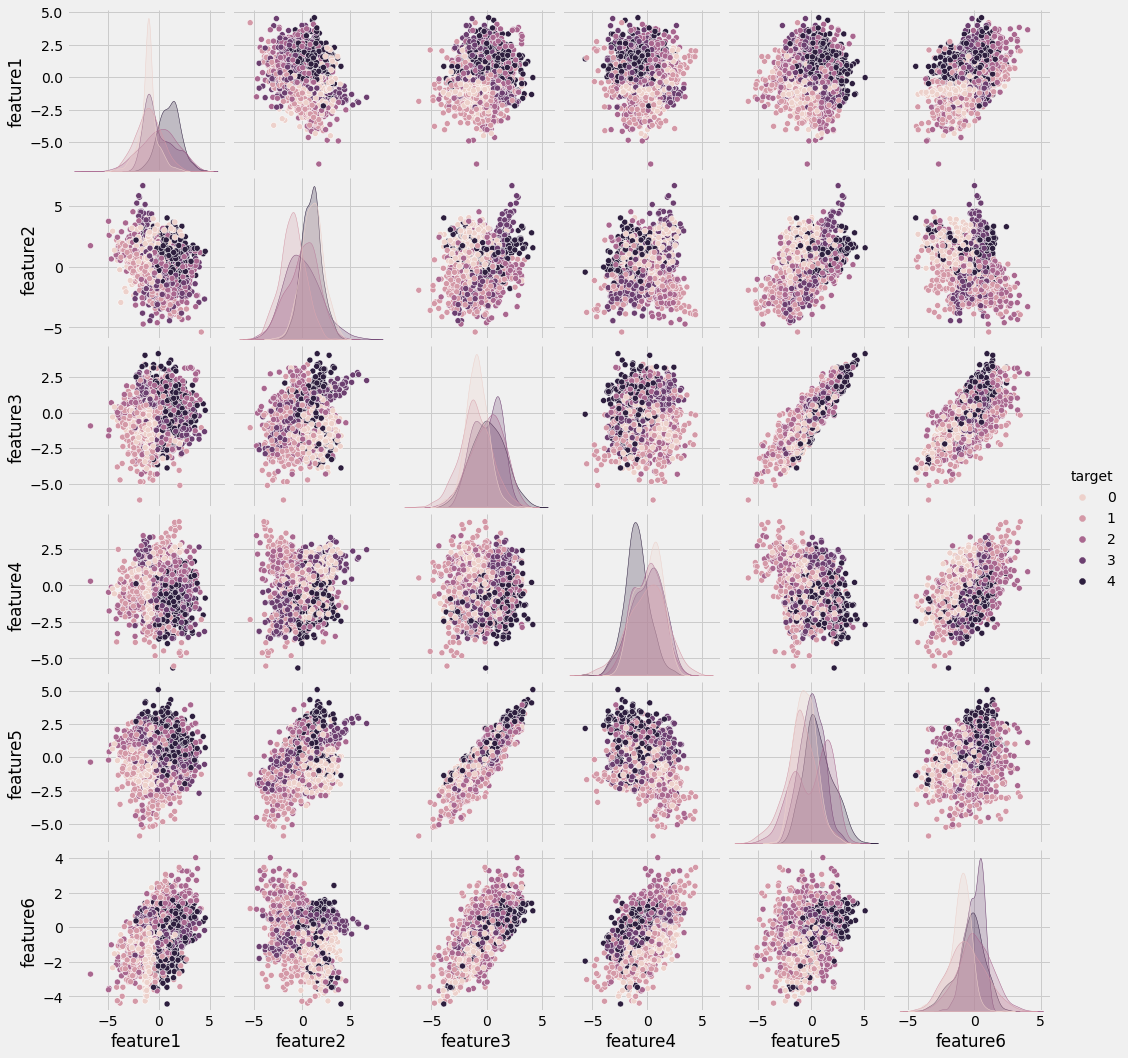

In [15]:
sns.pairplot(df,hue='target')

## División de los datos en conjuntos separados de entrenamiento y test

In [16]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns='target'),
                                        df['target'],
                                        random_state = 123
                                    )

Entrenamos el modelo con los valores por defecto de los hiperparametros

Matriz de confusión
-------------------


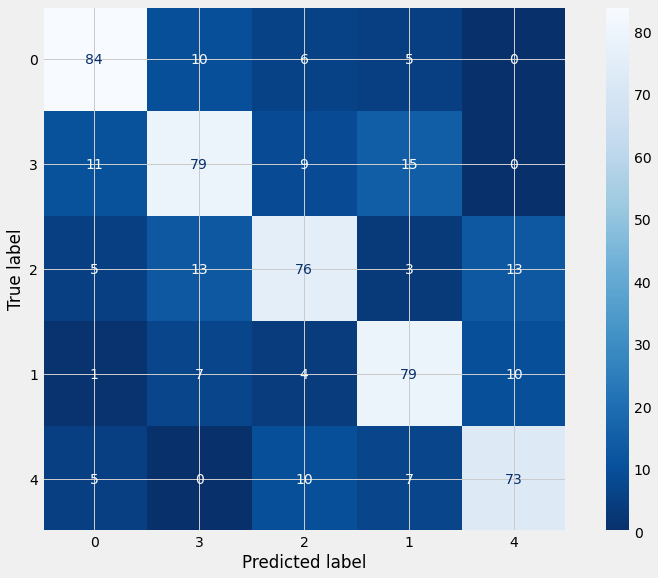


El accuracy de test es: 74.5696862500809 %


In [17]:
forest = RandomForestClassifier(random_state = 123)
modelF = forest.fit(X_train, y_train)
predicciones = modelF.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

In [18]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predicciones
    )
)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.72      0.69      0.71       114
           2       0.72      0.69      0.71       110
           3       0.72      0.78      0.75       101
           4       0.76      0.77      0.76        95

    accuracy                           0.74       525
   macro avg       0.75      0.75      0.75       525
weighted avg       0.74      0.74      0.74       525



## Ajuste de hiperparametros


Buscamos la mejor combinación de parametros (n_estimators, max_depth, min_samples_split y min_samples_leaf) que da los mejores resultados en el conjunto de datos de entrenamiento

In [20]:
n_estimators = [20, 50, 100, 300, 500, 800]
max_depth = [2, 5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 10]

In [21]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'n_estimators',
                                param_range = n_estimators, cv = 3)

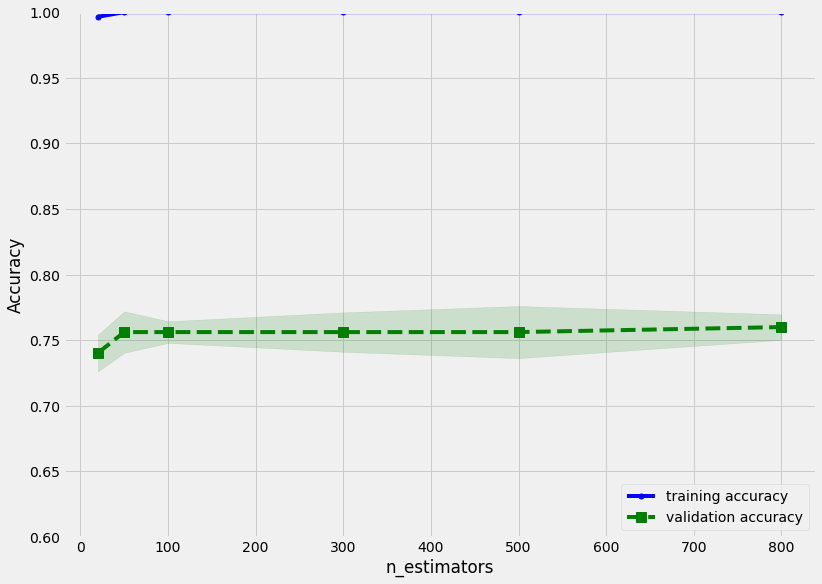

In [24]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(n_estimators, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(n_estimators, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(n_estimators, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(n_estimators,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.show()

In [25]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'max_depth',
                                param_range = max_depth, cv = 3)

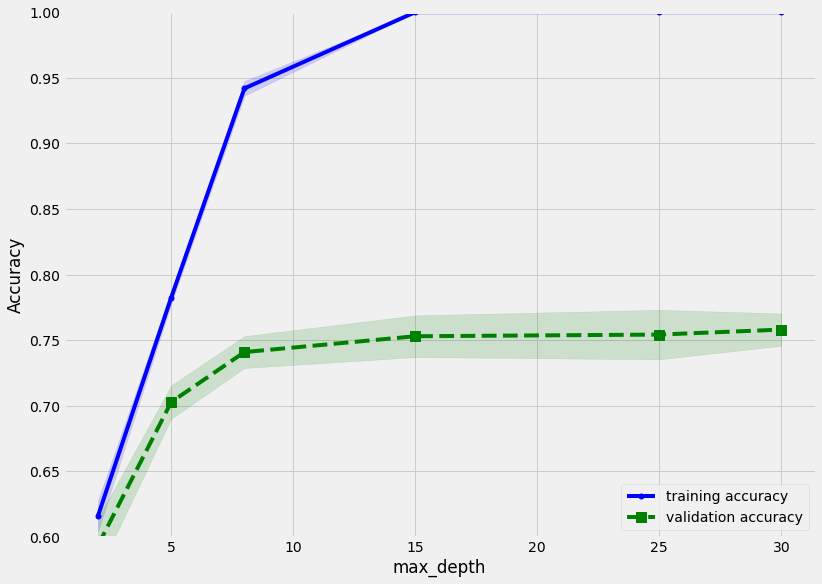

In [27]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(max_depth, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(max_depth, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(max_depth, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(max_depth,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.show()

In [28]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_split',
                                param_range = min_samples_split, cv = 3)

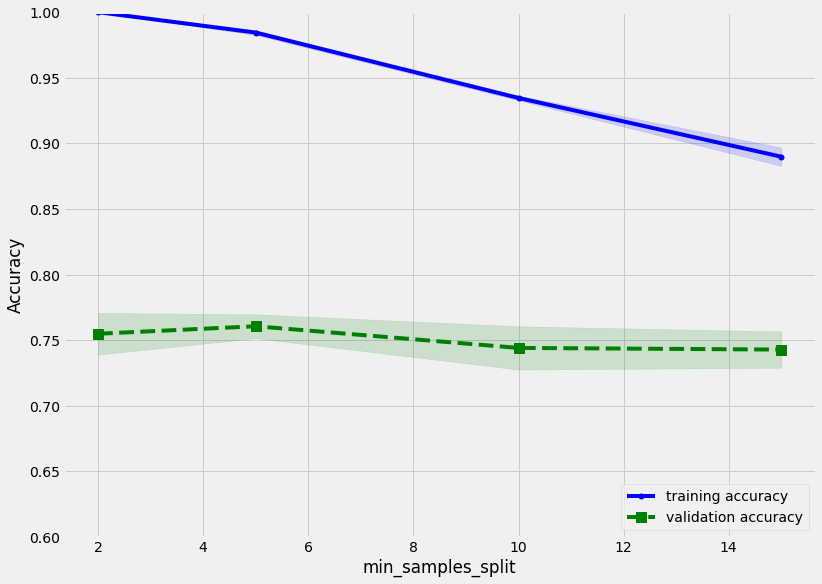

In [30]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(min_samples_split, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(min_samples_split, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(min_samples_split, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(min_samples_split,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.show()

In [31]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_leaf',
                                param_range = min_samples_leaf, cv = 3)

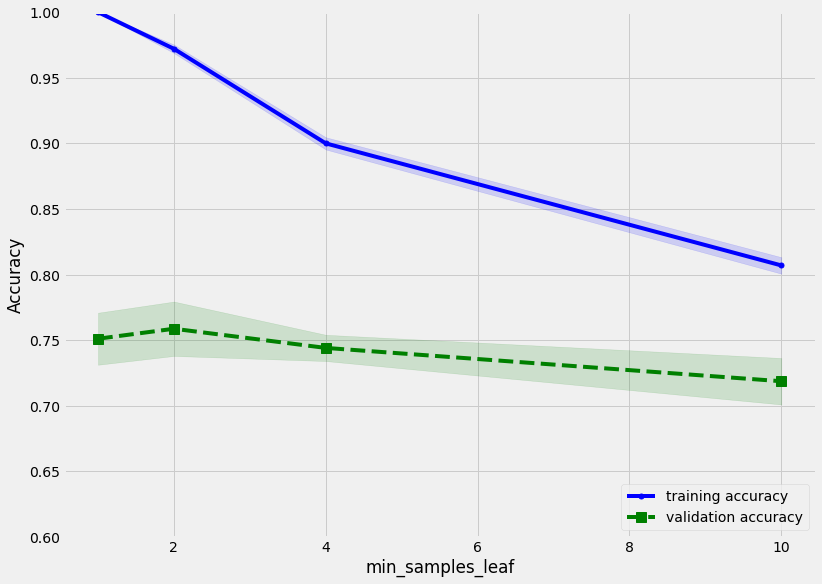

In [33]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

plt.plot(min_samples_leaf, train_mean,    color='blue', marker='o',
    markersize=5,
    label='training accuracy')
plt.fill_between(min_samples_leaf, train_mean + train_std,
    train_mean - train_std, alpha=0.15,
    color='blue')
plt.plot(min_samples_leaf, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=10,
    label='validation accuracy')
plt.fill_between(min_samples_leaf,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')
plt.grid(True)
plt.legend(loc='lower right')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.show()

los valores optimos encontrados con diferentes valores de un solo hiperparametro son :


*   n_estimators: 500
*   min_samples_split : 5
*   max_depth: 25
*   min_samples_leaf: 2

Con los mejores hiperparametros idenficados, se reentrena el modelo:





Matriz de confusión
-------------------


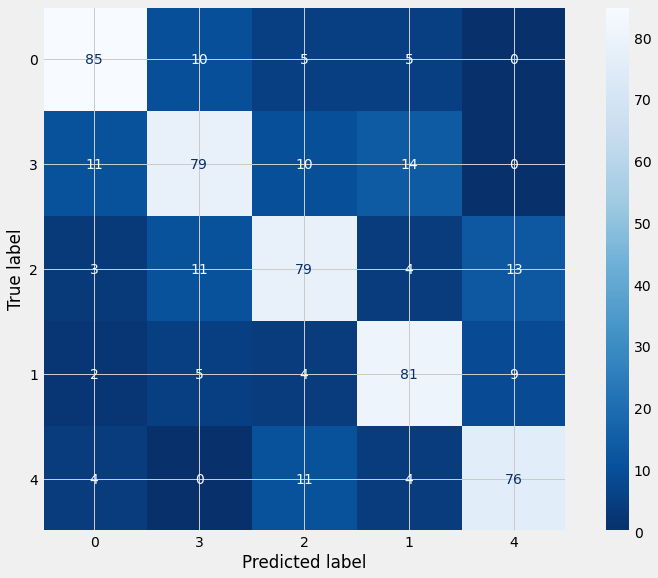


El accuracy de test es: 76.30261136034584 %


In [34]:
forestVC = RandomForestClassifier(random_state = 123,
                                  n_estimators = 500,
                                  max_depth = 25, 
                                  min_samples_split = 5,  min_samples_leaf = 2) 
modelVC = forestVC.fit(X_train, y_train) 

# Predicción y evaluación del modelo
predicciones = modelVC.predict(X_test)

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
# print(mat_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues_r)
plt.show()
print("")
print(f"El accuracy de test es: {100 * f1_score(y_test, predicciones, average='macro')} %")

Se puede apreciar una mejora minima

## Importancia de predictores

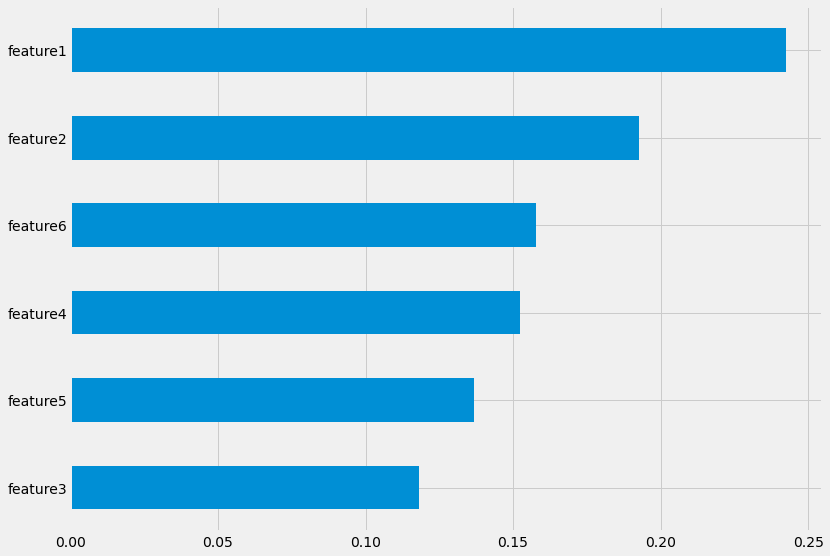

In [39]:
feature_scores = pd.Series(modelVC.feature_importances_, index=X_train.columns).sort_values()
feature_scores.plot(kind='barh')

Acorde a los datos de entrenamiento feature1 y feature2 son los predictores mas influyentes



#Guardamos datos 

Recuperamos el mejor modelo obtenido y guardamos los datos de la predicción

In [46]:
# guardamos los datos de la prediccion del mejor modelo en un csv
df_res = pd.DataFrame(predicciones,columns=['final_status'])
df_res.to_csv('predicciones.csv',index=None)